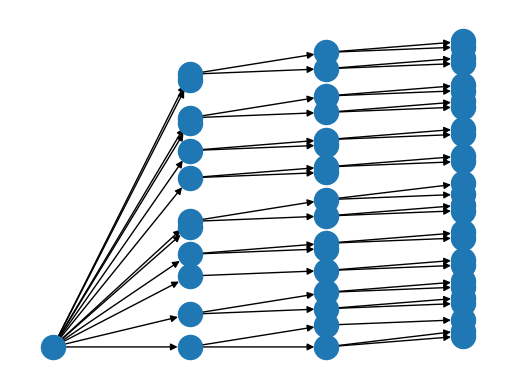

In [10]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

distancia = 100  
distancia_extra = 100

G = nx.DiGraph()

positions = {}

y_actual = 0

with open('tabla_final.csv', 'r') as f:
  reader = csv.DictReader(f)

  x = 0

  for row in reader:
    from_node = row['From']
    to_node = row['Tag']

    if from_node not in positions:
      positions[from_node] = (x, y_actual)
      x += distancia
    
    if to_node not in positions:
      nuevo_x = positions[from_node][0] + distancia
      nuevo_y = y_actual
      
      positions[to_node] = (nuevo_x, nuevo_y)

    if nuevo_x > x:
      x = 0
      
      y_actual += distancia
      
      if y_actual == distancia:
        y_actual += distancia_extra

      elif y_actual == distancia + distancia_extra:
        y_actual += distancia_extra

    G.add_edge(from_node, to_node)    

fig, ax = plt.subplots()
nx.draw(G, pos=positions, ax=ax)

plt.axis('off')
plt.show()